In [1]:
#Experiment was run with a c6220 Node.

import pandas as pd

df = pd.read_csv("./results_2.csv")
df['Poll Enabled'] = df['STATE'].apply(lambda x: 0 if (x & 1) != 0 else 1)
df['C1 Enabled'] = df['STATE'].apply(lambda x: 0 if (x & 2) != 0 else 1)
df['C1E Enabled'] = df['STATE'].apply(lambda x: 0 if (x & 4) != 0 else 1)
df['C3 Enabled'] = df['STATE'].apply(lambda x: 0 if (x & 8) != 0 else 1)
df['C6 Enabled'] = df['STATE'].apply(lambda x: 0 if (x & 16) != 0 else 1)
display(df)

/tmp/ipykernel_869643/681036750.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


,STATE,CORE_ENERGY,PKG_ENERGY,RAM_ENERGY,POLL_RES,C1_RES,C1E_RES,C3_RES,C6_RES,Poll Enabled,C1 Enabled,C1E Enabled,C3 Enabled,C6 Enabled
0,0,151.71,590.78,239.55,24068892,12686724,11701871,10914,366420070,1,1,1,1,1
1,1,152.71,592.27,241.91,24068892,12687005,11702075,11273,366448782,0,1,1,1,1
2,2,153.85,602.52,243.84,24069057,12687040,11702425,11722,366478137,1,0,1,1,1
3,3,152.52,594.39,242.37,24069068,12687040,11703020,12061,366507551,0,0,1,1,1
4,4,149.38,585.48,240.26,24069088,12687495,11703102,12389,366536105,1,1,0,1,1
5,5,148.56,579.59,239.97,24069088,12688303,11703102,12823,366565952,0,1,0,1,1
6,6,156.42,602.29,241.83,24069326,12688383,11703102,13349,366597245,1,0,0,1,1
7,7,149.95,586.61,240.07,24069343,12688383,11703102,14652,366627842,0,0,0,1,1
8,8,147.55,577.05,241.18,24069372,12688588,11703408,15033,366657633,1,1,1,0,1
9,9,147.76,585.13,242.22,24069372,12688842,11703920,15033,366687175,0,1,1,0,1


<Figure size 432x288 with 0 Axes>

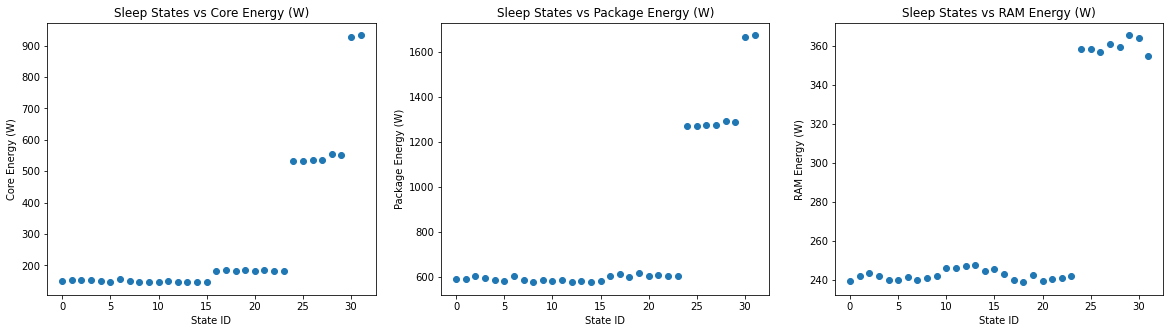

In [2]:
import matplotlib.pyplot as plt
plt.figure()

fig, plots = plt.subplots(1, 3, figsize=(20, 5))

plots[0].scatter(df['STATE'], df['CORE_ENERGY'])
plots[0].set_xlabel("State ID")
plots[0].set_ylabel("Core Energy (W)")
plots[0].set_title("Sleep States vs Core Energy (W)")

plots[1].scatter(df['STATE'], df['PKG_ENERGY'])
plots[1].set_xlabel("State ID")
plots[1].set_ylabel("Package Energy (W)")
plots[1].set_title("Sleep States vs Package Energy (W)")

plots[2].scatter(df['STATE'], df['RAM_ENERGY'])
plots[2].set_xlabel("State ID")
plots[2].set_ylabel("RAM Energy (W)")
plots[2].set_title("Sleep States vs RAM Energy (W)")

plt.show()

In [3]:
# Obtaining the differences between values in residency

df2 = df[['POLL_RES', 'C1_RES', 'C1E_RES', 'C3_RES', 'C6_RES']]
enabledCols = ['Poll Enabled', 'C1 Enabled', 'C1E Enabled', 'C3 Enabled', 'C6 Enabled']
df2 = df2.diff()
df2[enabledCols] = df[enabledCols]
display(df2)

,POLL_RES,C1_RES,C1E_RES,C3_RES,C6_RES,Poll Enabled,C1 Enabled,C1E Enabled,C3 Enabled,C6 Enabled
0,NaN,NaN,NaN,NaN,NaN,1,1,1,1,1
1,0.0,281.0,204.0,359.0,28712.0,0,1,1,1,1
2,165.0,35.0,350.0,449.0,29355.0,1,0,1,1,1
3,11.0,0.0,595.0,339.0,29414.0,0,0,1,1,1
4,20.0,455.0,82.0,328.0,28554.0,1,1,0,1,1
5,0.0,808.0,0.0,434.0,29847.0,0,1,0,1,1
6,238.0,80.0,0.0,526.0,31293.0,1,0,0,1,1
7,17.0,0.0,0.0,1303.0,30597.0,0,0,0,1,1
8,29.0,205.0,306.0,381.0,29791.0,1,1,1,0,1
9,0.0,254.0,512.0,0.0,29542.0,0,1,1,0,1


<Figure size 432x288 with 0 Axes>

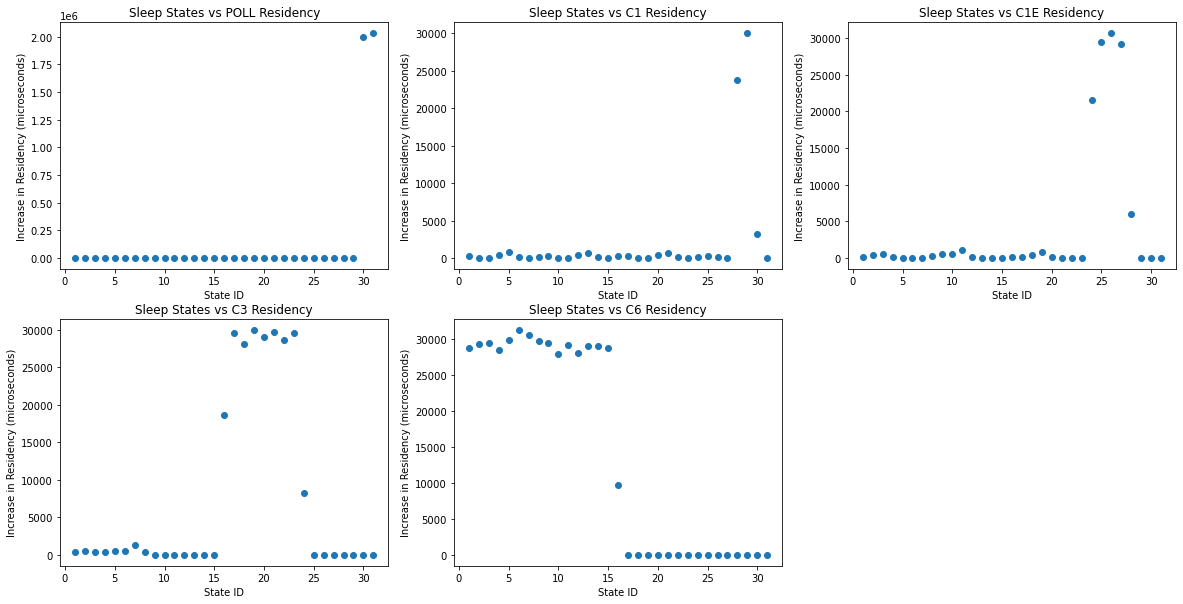

In [4]:
plt.figure()

fig, plots = plt.subplots(2, 3, figsize=(20, 10))

plots[0,0].scatter(df['STATE'], df2['POLL_RES'])
plots[0,0].set_xlabel("State ID")
plots[0,0].set_ylabel("Increase in Residency (microseconds)")
plots[0,0].set_title("Sleep States vs POLL Residency")

plots[0,1].scatter(df['STATE'], df2['C1_RES'])
plots[0,1].set_xlabel("State ID")
plots[0,1].set_ylabel("Increase in Residency (microseconds)")
plots[0,1].set_title("Sleep States vs C1 Residency")

plots[0,2].scatter(df['STATE'], df2['C1E_RES'])
plots[0,2].set_xlabel("State ID")
plots[0,2].set_ylabel("Increase in Residency (microseconds)")
plots[0,2].set_title("Sleep States vs C1E Residency")

plots[1,0].scatter(df['STATE'], df2['C3_RES'])
plots[1,0].set_xlabel("State ID")
plots[1,0].set_ylabel("Increase in Residency (microseconds)")
plots[1,0].set_title("Sleep States vs C3 Residency")

plots[1,1].scatter(df['STATE'], df2['C6_RES'])
plots[1,1].set_xlabel("State ID")
plots[1,1].set_ylabel("Increase in Residency (microseconds)")
plots[1,1].set_title("Sleep States vs C6 Residency")

fig.delaxes(plots[1,2])
plt.show()